In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [24]:
df=pd.read_csv("sales.csv",encoding="unicode_escape")

In [25]:
#checking top 5 rows
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [26]:
#checking bottom 5 rows
df.tail()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
11246,1000695,Manning,P00296942,M,18-25,19,1,Maharashtra,Western,Chemical,Office,4,370.0,NaN,NaN
11247,1004089,Reichenbach,P00171342,M,26-35,33,0,Haryana,Northern,Healthcare,Veterinary,3,367.0,NaN,NaN
11248,1001209,Oshin,P00201342,F,36-45,40,0,Madhya Pradesh,Central,Textile,Office,4,213.0,NaN,NaN
11249,1004023,Noonan,P00059442,M,36-45,37,0,Karnataka,Southern,Agriculture,Office,3,206.0,NaN,NaN
11250,1002744,Brumley,P00281742,F,18-25,19,0,Maharashtra,Western,Healthcare,Office,3,188.0,NaN,NaN


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


# Drop unrelated columns

In [28]:
df.drop(columns=["Status","unnamed1"],inplace=True)

In [29]:
df.head(2)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0


# Check for null values.

In [77]:
df.isnull().sum()

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

# Drop null values

In [31]:
df.dropna(inplace=True)

In [32]:
df.isnull().sum()

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

In [35]:
 df[["Age","Orders","Amount"]].describe()

,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610858
std,12.753866,1.114967,5222.355869
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


# Average age of customers

In [76]:
df.groupby(["Cust_name"])["Age"].mean()

Cust_name
Aaron       40.000000
Aarushi     40.714286
Aastha      26.222222
Aayush      39.142857
Aayushi     42.875000
              ...    
Zuschuss    39.333333
Zydlo       50.714286
Zypern      22.300000
liebe       28.125000
percer      47.857143
Name: Age, Length: 1250, dtype: float64

# Majority buyers

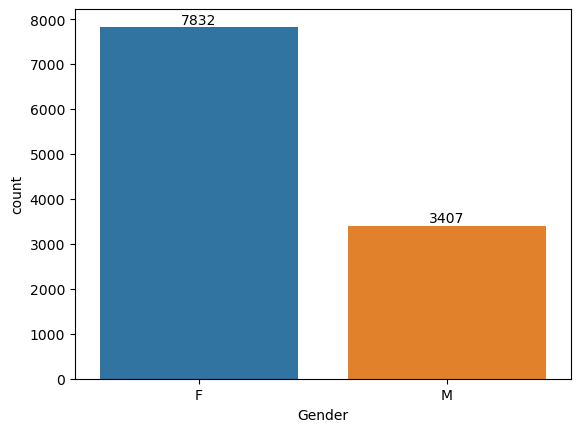

In [36]:
#bar plot for gender and its count
a=sns.countplot(x="Gender",data=df)
for each in a.containers:
    a.bar_label(each)

From above graph majority buyers are female.
female purchase products greater than men.

# Majority customers fall(age)

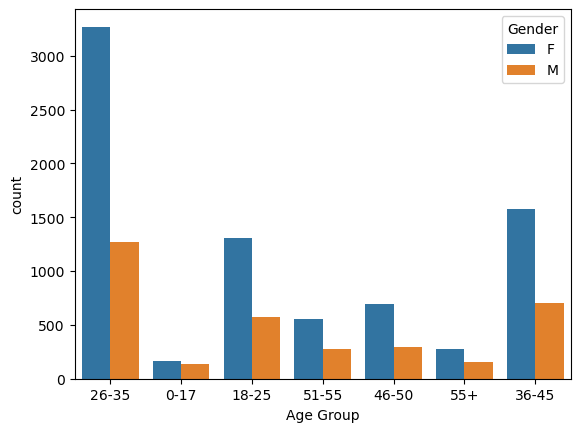

In [11]:
b=sns.countplot(data=df,x="Age Group",hue="Gender")

<Axes: xlabel='Age Group', ylabel='Amount'>

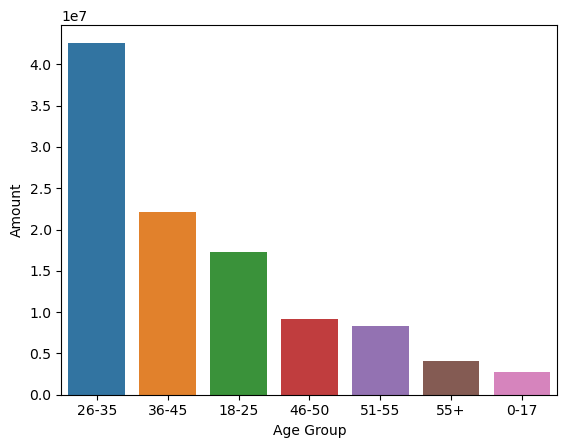

In [46]:
#plotting Total Amount and Age Group
sales_age = df.groupby(['Age Group'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.barplot(x = 'Age Group',y= 'Amount' ,data = sales_age)

From above graph age group 26-35 have majority customers

# State

<Axes: xlabel='State', ylabel='Amount'>

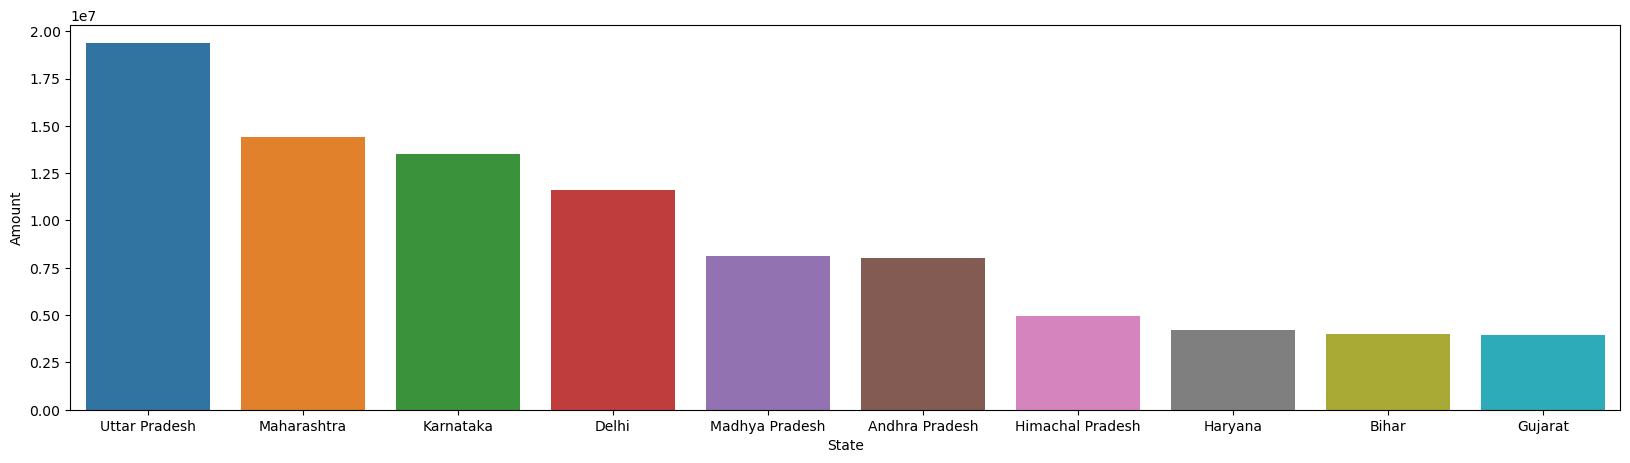

In [78]:
#Top 10 states of highest sales
plt.figure(figsize=(20,5))
sales=df.groupby(["State"],as_index=False)["Amount"].sum().sort_values(by='Amount',ascending=False).head(10)
sns.barplot(data=sales,x="State",y="Amount")

from above graph Uttar Pradesh state has highest sales

# Occupation 

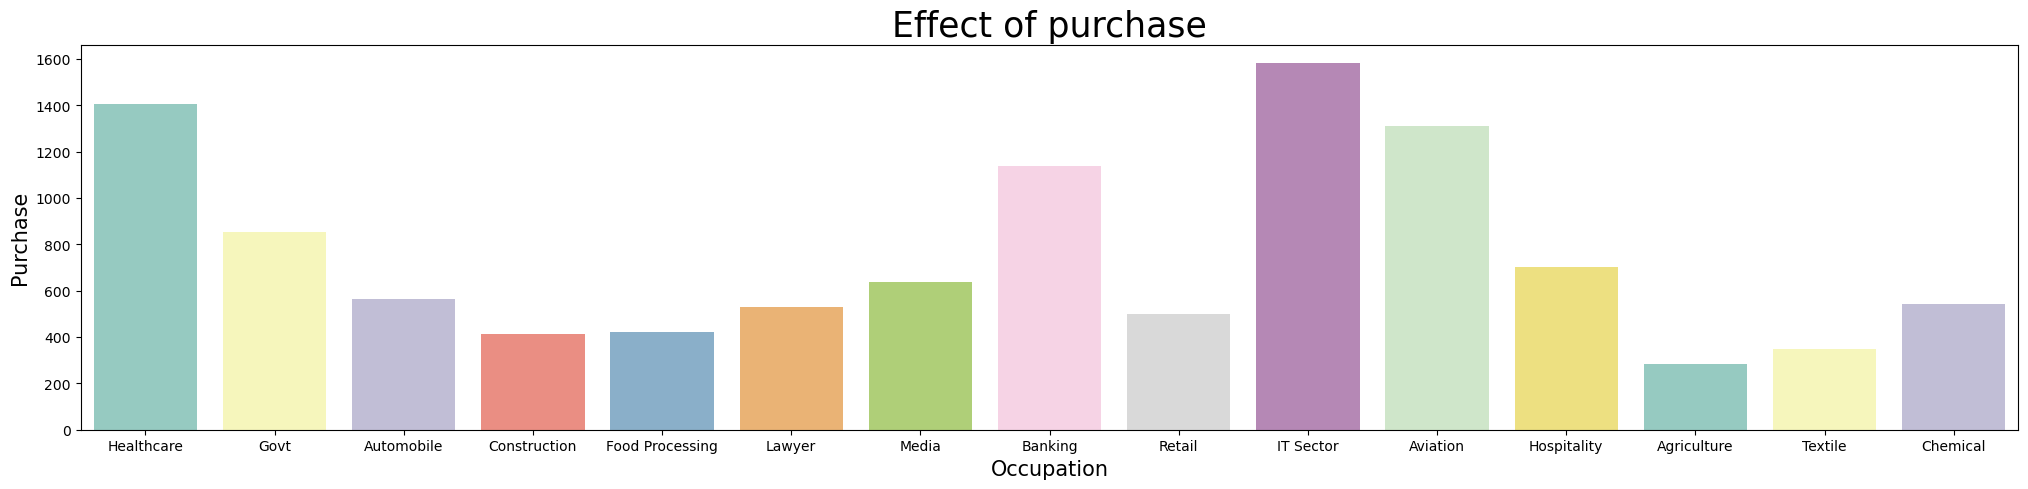

In [65]:
plt.figure(figsize=(25,5))
sns.countplot(x=df["Occupation"],palette="Set3")
plt.title("Effect of purchase",size=25)
plt.xlabel("Occupation",size=15)
plt.ylabel("Purchase",size=15)
plt.show()

From above graph most buyers are working in IT,Aviation,Healthcare.

# Top 10 products to be sold

In [15]:
df.head(3)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0


In [16]:
top_10=df["Product_Category"].value_counts().head(10)
top_10

Clothing & Apparel       2655
Food                     2490
Electronics & Gadgets    2087
Footwear & Shoes         1059
Household items           520
Beauty                    422
Games & Toys              386
Sports Products           356
Furniture                 352
Pet Care                  212
Name: Product_Category, dtype: int64

<Axes: xlabel='Product_Category', ylabel='count'>

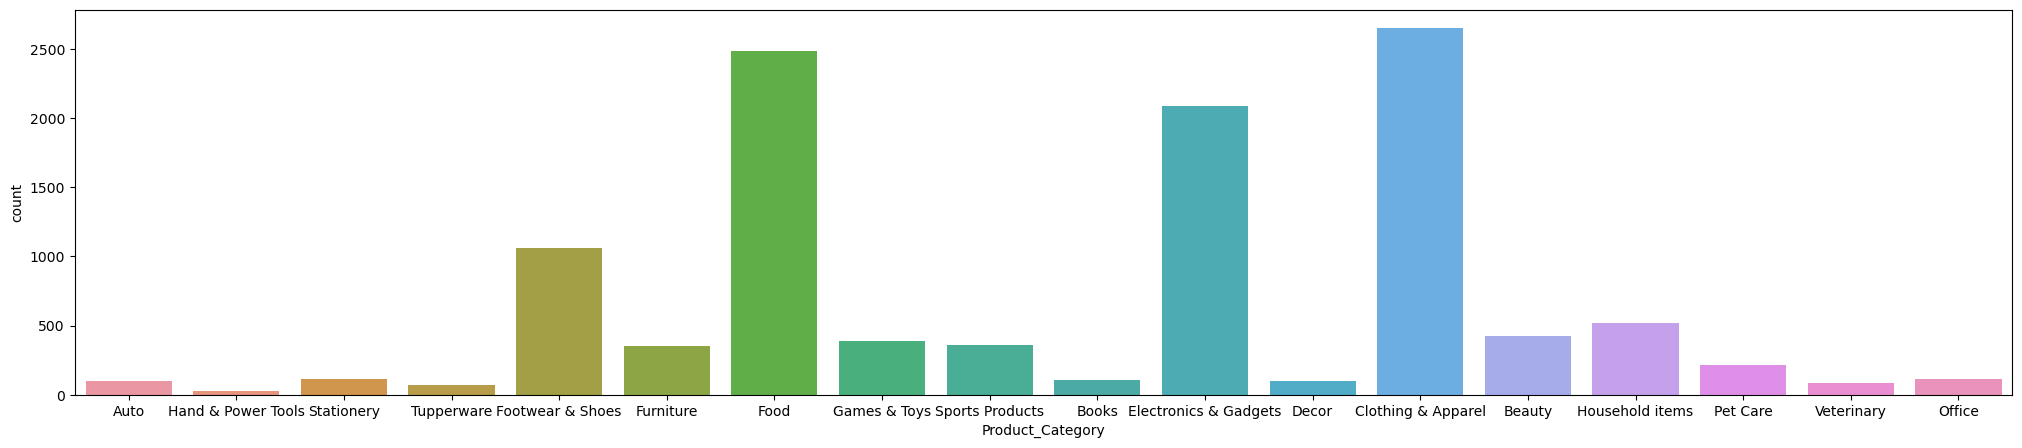

In [17]:
plt.figure(figsize=(25,5))
sns.countplot(x="Product_Category",data=df)


From above graph most sold products are Clothing and apparel,Food, Electronics.

# Marital Status

<Axes: xlabel='Marital_Status', ylabel='count'>

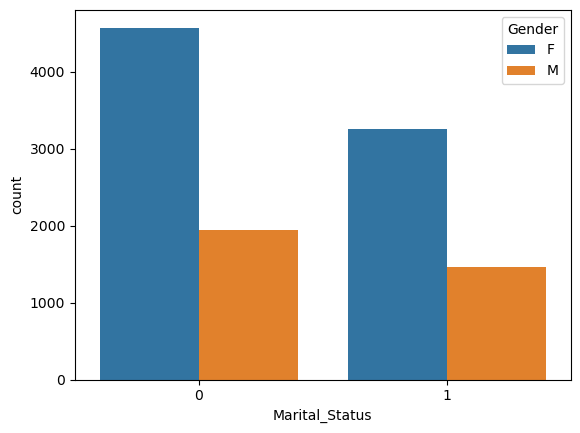

In [55]:
sns.countplot(data=df,x="Marital_Status",hue="Gender")

From above Graph ,most of the  married females are  buyers.

### Conclusion:

Married Females age group 26-35 years are most buyers and they are from Maharashtra,karnataka and working in IT, Healthcare and
Aviation. they mostly buy products from Food, Clothing and Electrics Category. 